In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

659

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a2c6cd16db8e2c769f32d3b92bc8712d


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | semnan
Processing Record 3 of Set 1 | sampit
Processing Record 4 of Set 1 | russell
Processing Record 5 of Set 1 | vostok
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | esil
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | coihaique
Processing Record 13 of Set 1 | longlac
City not found. Skipping...
Processing Record 14 of Set 1 | trincomalee
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | mandalgovi
Processing Record 20 of Set 1 | pribelskiy
City not found. Skipping...
Proc

Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | candawaga
City not found. Skipping...
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | matay
Processing Record 46 of Set 4 | valparaiso
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | atuona
Processing Record 49 of Set 4 | mramor
Processing Record 50 of Set 4 | araouane
Processing Record 1 of Set 5 | marienburg
Processing Record 2 of Set 5 | sioux falls
Processing Record 3 of Set 5 | saint-felicien
Processing Record 4 of Set 5 | medina
Processing Record 5 of Set 5 | penalva
Processing Record 6 of Set 5 | labutta
City not found. Skipping...
Processing Record 7 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 8 of Set 5 | imbituba
Processing Record 9 of Set 5 | kletskaya
Processing Record 10 of Set 5 | shepsi
Processing Record 11 of Set 5 | phan thiet
Processing Record 12 of Set 5 | vao
Processing Record 13 of Set 5 | hofn
Processing Record 1

Processing Record 32 of Set 8 | emerald
Processing Record 33 of Set 8 | iwanai
Processing Record 34 of Set 8 | sal rei
Processing Record 35 of Set 8 | itaguai
Processing Record 36 of Set 8 | shache
Processing Record 37 of Set 8 | mindyak
Processing Record 38 of Set 8 | diego de almagro
Processing Record 39 of Set 8 | jimma
Processing Record 40 of Set 8 | doha
Processing Record 41 of Set 8 | mawlaik
Processing Record 42 of Set 8 | redmond
Processing Record 43 of Set 8 | rungata
City not found. Skipping...
Processing Record 44 of Set 8 | esna
Processing Record 45 of Set 8 | agadez
Processing Record 46 of Set 8 | sovetskaya gavan
Processing Record 47 of Set 8 | san-pedro
Processing Record 48 of Set 8 | sinnar
Processing Record 49 of Set 8 | tautira
Processing Record 50 of Set 8 | broken hill
Processing Record 1 of Set 9 | alberdi
Processing Record 2 of Set 9 | brae
Processing Record 3 of Set 9 | farafangana
Processing Record 4 of Set 9 | wadena
Processing Record 5 of Set 9 | mogadishu
Pro

Processing Record 22 of Set 12 | pangnirtung
Processing Record 23 of Set 12 | guarapari
Processing Record 24 of Set 12 | dandong
Processing Record 25 of Set 12 | barinas
Processing Record 26 of Set 12 | klaksvik
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | kaysville
Processing Record 29 of Set 12 | mount isa
Processing Record 30 of Set 12 | newport
Processing Record 31 of Set 12 | neutraubling
Processing Record 32 of Set 12 | barcelos
Processing Record 33 of Set 12 | bowen
Processing Record 34 of Set 12 | campbell river
Processing Record 35 of Set 12 | sheltozero
Processing Record 36 of Set 12 | boende
Processing Record 37 of Set 12 | manyana
Processing Record 38 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 39 of Set 12 | staryy saltiv
Processing Record 40 of Set 12 | u thong
Processing Record 41 of Set 12 | solenzo
Processing Record 42 of Set 12 | miranda
Processing Record 43 of Set 12 | nexo
Processing Record 44 of Set 12 | talaya
Pr

In [9]:
len(city_data)

610

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,42.80,100,75,8.05,AR,2020-04-15 06:18:11
1,Semnan,35.57,53.40,54.68,38,10,3.83,IR,2020-04-15 06:25:41
2,Sampit,-2.53,112.95,91.15,59,29,1.05,ID,2020-04-15 06:25:41
3,Russell,32.35,-85.20,55.40,66,1,9.17,US,2020-04-15 06:25:42
4,Vostok,46.49,135.88,44.13,40,52,9.44,RU,2020-04-15 06:18:45
5,Butaritari,3.07,172.79,83.55,80,45,15.10,KI,2020-04-15 06:15:11
6,Esil,51.96,66.40,47.73,46,0,19.39,KZ,2020-04-15 06:25:42
7,Hobart,-42.88,147.33,61.00,87,90,9.17,AU,2020-04-15 06:18:11
8,Raudeberg,61.99,5.14,45.00,93,75,12.75,NO,2020-04-15 06:18:35
9,Coihaique,-45.58,-72.07,48.20,87,90,2.33,CL,2020-04-15 06:18:25


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-04-15 06:18:11,-54.80,-68.30,42.80,100,75,8.05
1,Semnan,IR,2020-04-15 06:25:41,35.57,53.40,54.68,38,10,3.83
2,Sampit,ID,2020-04-15 06:25:41,-2.53,112.95,91.15,59,29,1.05
3,Russell,US,2020-04-15 06:25:42,32.35,-85.20,55.40,66,1,9.17
4,Vostok,RU,2020-04-15 06:18:45,46.49,135.88,44.13,40,52,9.44
5,Butaritari,KI,2020-04-15 06:15:11,3.07,172.79,83.55,80,45,15.10
6,Esil,KZ,2020-04-15 06:25:42,51.96,66.40,47.73,46,0,19.39
7,Hobart,AU,2020-04-15 06:18:11,-42.88,147.33,61.00,87,90,9.17
8,Raudeberg,NO,2020-04-15 06:18:35,61.99,5.14,45.00,93,75,12.75
9,Coihaique,CL,2020-04-15 06:18:25,-45.58,-72.07,48.20,87,90,2.33


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

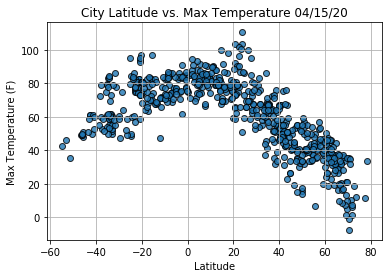

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

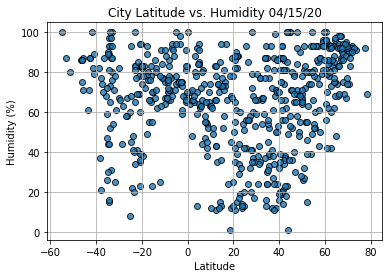

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

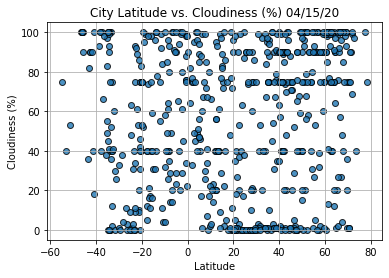

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

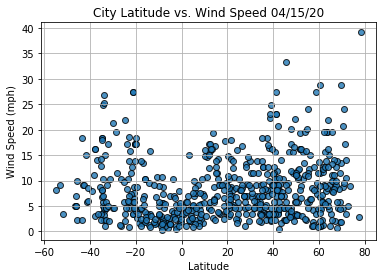

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
index13

City                         Hilo
Country                        US
Date          2020-04-15 06:17:32
Lat                         19.73
Lng                       -155.09
Max Temp                     75.2
Humidity                       78
Cloudiness                     90
Wind Speed                   3.36
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Semnan,IR,2020-04-15 06:25:41,35.57,53.40,54.68,38,10,3.83
3,Russell,US,2020-04-15 06:25:42,32.35,-85.20,55.40,66,1,9.17
4,Vostok,RU,2020-04-15 06:18:45,46.49,135.88,44.13,40,52,9.44
5,Butaritari,KI,2020-04-15 06:15:11,3.07,172.79,83.55,80,45,15.10
6,Esil,KZ,2020-04-15 06:25:42,51.96,66.40,47.73,46,0,19.39


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

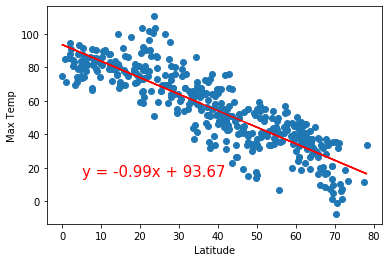

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,15))

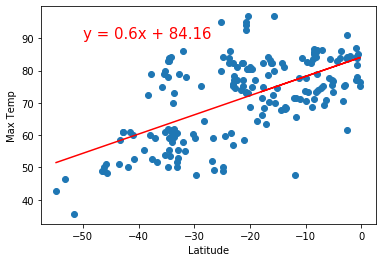

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

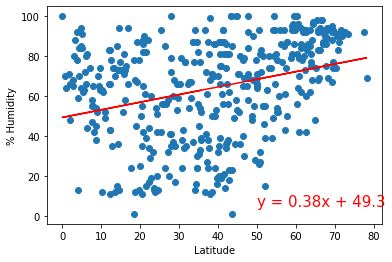

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n                        for % Humidity', '% Humidity',(50,5))

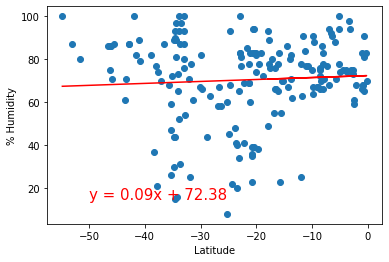

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                        for % Humidity', '% Humidity',(-50,15))

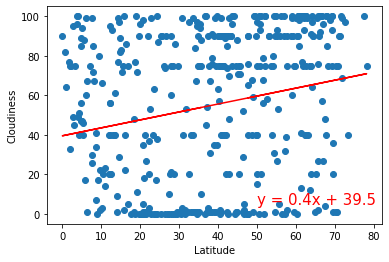

In [44]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n                        for Cloudiness', 'Cloudiness',(50,5))

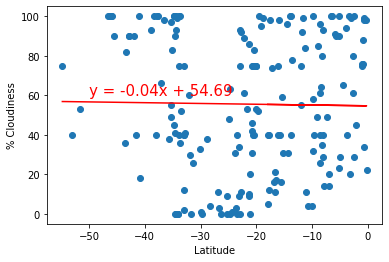

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Cloudiness', '% Cloudiness',(-50,60))

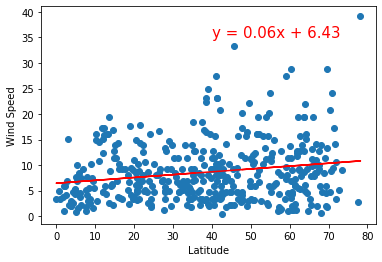

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n                for Wind Speed', 'Wind Speed',(40,35))

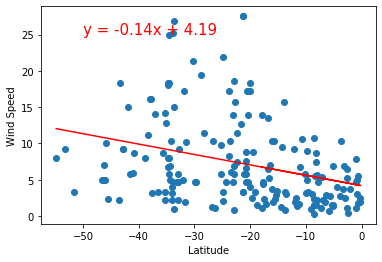

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                  for Wind Speed', 'Wind Speed',(-50,25))